# 1: Problem Introduction & motivation <a class="anchor" id="Intro"></a>

The problem is that we need to predict price(MSRP) of a car based on various features. These include make, model, year, engine fuel type, etc. Anybody in the automotive industry woud benefit from the information collected here, specially car dealerships (to set competitive prices) and potential car buyers (to understand the fair market value). Other stakeholders would be insurance companies, that would use the MSRP to calculate premiums.

# 2:Data Preparation<a class="anchor" id="Data_Preparation"></a>

# 2.1 Get  Data <a class="anchor" id="Get_data"></a>


In [ ]:

from google.colab import files
uploaded = files.upload()

import pandas as pd


Saving data (5).csv to data (5).csv


In [ ]:
import pandas as pd
import numpy as np
import io

# Assuming the file name is 'car_pricing_data.csv' and it's been uploaded
data = pd.read_csv(io.BytesIO(uploaded['data (5).csv']))

# 2.1 Clean data

#dealing with categorical columns

Machine learning models require all inputs to be numeric, this is why we convert categorical columns to numeric

In [ ]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Apply One-Hot Encoding to all categorical columns
data = pd.get_dummies(data, columns=categorical_columns)

#duplicates

let's eliminate duplicates to have a clearer datset

In [ ]:
# Drop duplicates
data = data.drop_duplicates()

# dealing with missing values

In the code below, I've opted to utilize mean and mode for imputation based on their ability to represent the central tendency of our data.

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

# Impute missing numerical features with the median
for column in data.select_dtypes(include=np.number).columns:
    if data[column].isnull().any():
        data[column] = data[column].fillna(data[column].median())

# Impute missing categorical features with the mode
for column in data.select_dtypes(include=['object']).columns:
    if data[column].isnull().any():
        data[column] = data[column].fillna(data[column].mode()[0])

# Verify there are no missing values left
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])


Engine HP           69
Engine Cylinders    30
Number of Doors      6
dtype: int64
Series([], dtype: int64)


# 2.3 Explore data/ split the data<a class="anchor" id="Explore"></a>



In [ ]:
# Descriptive statistics
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11199.000000,11199.000000,11199.000000,11199.000000,11199.000000,11199.000000,11199.000000,1.119900e+04
mean,2010.714528,253.300205,5.666845,3.454416,26.610590,19.731851,1558.483347,4.192593e+04
std,7.228211,109.816822,1.794696,0.872804,8.977641,9.177555,1445.668872,6.153505e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,172.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.159950e+04
50%,2015.000000,239.000000,6.000000,4.000000,25.000000,18.000000,1385.000000,3.067500e+04
75%,2016.000000,303.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.303250e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


#Apply pd.get_dummies to the DataFrame

In [ ]:
data_with_dummies = pd.get_dummies(data)

# splitting the data

In [11]:
from sklearn.model_selection import train_test_split

X = data.drop('MSRP', axis=1)  # or a selection of features
y = data['MSRP']

# Split the data into a 80% training set and a 20% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

The ratio of 80/20 is a common choice that balances having enough data to train the model effectively (80%) while still setting aside enough unseen data for testing (20%).

#visualizations

In [12]:
# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

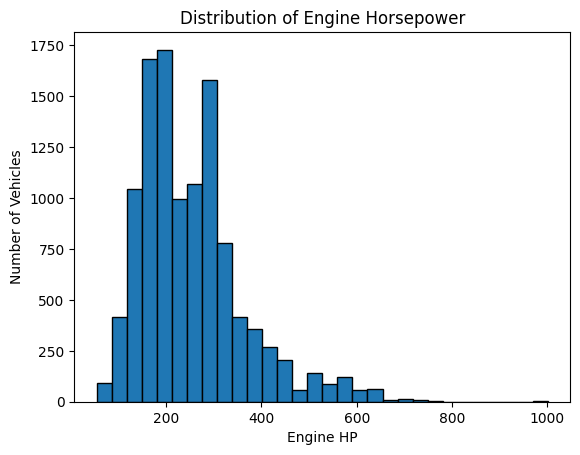

In [13]:
# Plotting histogram for Engine HP
plt.hist(data['Engine HP'], bins=30, edgecolor='black')
plt.title('Distribution of Engine Horsepower')
plt.xlabel('Engine HP')
plt.ylabel('Number of Vehicles')
plt.show()

The bimodal nature of the distribution suggests there are two groups of vehicles with distinct engine horsepower characteristics. Understanding this help us determine if Engine HP is a factor contributing Price, and it seems that there is, most cars are sold between 100 and 300 engine power.

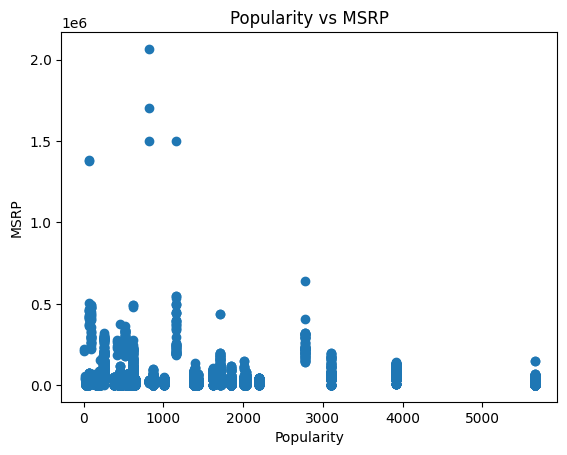

In [14]:
# Scatter plot of 'Engine HP' vs 'MSRP'
plt.scatter(data['Popularity'], data['MSRP'])
plt.title('Popularity vs MSRP')
plt.xlabel('Popularity')
plt.ylabel('MSRP')
plt.show()

The scatter plot illustrates the relationship between a vehicle's popularity and its MSRP. The scatter plot illustrates the relationship between a vehicle's popularity and its MSRP. There is no clear linear trend, personally, i would've anticipated a stronger correlation. Ther is considerable variability, which demonstrates that while it does play a role, other factors might be more significant.

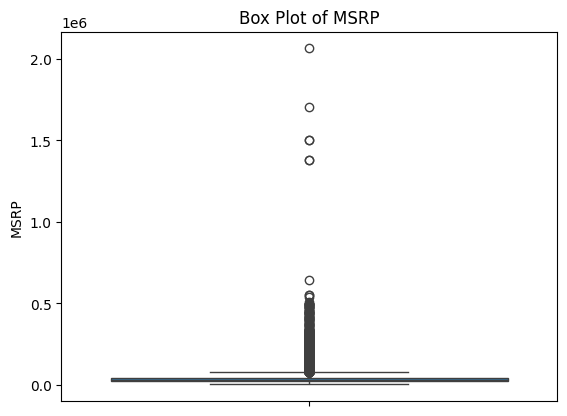

In [15]:
# Box plot for 'MSRP'
sns.boxplot(y=data['MSRP'])
plt.title('Box Plot of MSRP')
plt.ylabel('MSRP')
plt.show()

The boxplot shows the distribution of the Manufacturer's Suggested Retail Price (MSRP) for vehicles in the dataset, highlighting the median, quartiles, and potential outliers.

The code below identifies the outliers in the MSRP range

In [16]:
Q1 = data['MSRP'].quantile(0.25)
Q3 = data['MSRP'].quantile(0.75)
IQR = Q3 - Q1
# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filter out the outliers
data = data[(data['MSRP'] >= lower_bound) & (data['MSRP'] <= upper_bound)]

# 3. Modeling


# 1st model, explanatory variable: Popularity

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Simple model 1 using 'Engine HP'
model_1 = LinearRegression()
model_1.fit(X_train[['Popularity']], y_train)

# Predict MSRP using the first model
y_pred_1 = model_1.predict(X_test[['Popularity']])

# Calculate the SSE for the first model
sse_1 = mean_squared_error(y_test, y_pred_1) * len(y_test)
print(f"Sum of Squared Errors (SSE) for the first model: {sse_1}")

# The coefficient for 'Engine HP'
coef_engine_hp = model_1.coef_[0]
print(f"Coefficient for 'Popularity': {coef_engine_hp}")

# Output the model
model_1

Sum of Squared Errors (SSE) for the first model: 5670697069877.8
Coefficient for 'Popularity': -2.1142185576280346


LinearRegression()

The coefficient for 'Popularity' is approximately -2.11, which implies that as the popularity of a vehicle increases by one unit, the MSRP decreases by approximately $2.11, holding all other factors constant.



# 2nd Model, explanatory variable: city mpg

In [ ]:
if 'city mpg' not in X_train.columns:
    print(X_train.columns)

Index(['const', 'Popularity', 'log_Engine_HP', 'Year', 'log_city_mpg'], dtype='object')


In [ ]:
# Simple model 2 using 'city mpg'
model_2 = LinearRegression()
model_2.fit(X_train[['log_city_mpg']], y_train)

# Predict MSRP using the second model
y_pred_2 = model_2.predict(X_test[['log_city_mpg']])

sse_2 = mean_squared_error(y_test, y_pred_2) * len(y_test)
print(f"Sum of Squared Errors (SSE) for the second model: {sse_2}")

# The coefficient for 'city mpg'
coef_city_mpg = model_2.coef_[0]
print(f"Coefficient for 'log_city_mpg': {coef_city_mpg}")

# Output the model
model_2

Sum of Squared Errors (SSE) for the second model: 5252535122685.631
Coefficient for 'log_city_mpg': -64426.07148508876


LinearRegression()

The coefficient for 'log_city_mpg' is roughly -64426.87, indicating a substantial negative impact on MSRP with increased fuel efficiency in the city. In other words, a 1% increase in city mpg (as measured on a logarithmic scale) is associated with a decrease of approximately $644.27 in MSRP, all else being equal.

# Forward/Backward  variable selection

Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm

#forward selection

Begins with an empty model and adds variables one by one. . In each step, the variable that has the most significant improvement to the model fit is added.

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame and 'MSRP' is your target column

# Forward Selection Function
def forward_selection(data, target_variable, columns_to_include):
    remaining_features = columns_to_include[:]
    best_features = []
    while remaining_features:
        pval = pd.Series(index=remaining_features, dtype='float')
        for feature in remaining_features:
            X = data[best_features + [feature]]
            X_with_constant = sm.add_constant(X)
            model = sm.OLS(data[target_variable], X_with_constant).fit()
            pval[feature] = model.pvalues[feature]
        min_pval_feature = pval.idxmin()
        if pval.min() < 0.05:
            best_features.append(min_pval_feature)
            remaining_features.remove(min_pval_feature)
        else:
            break
    return best_features

# Define the columns to include in the model
columns_to_include = ['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
                      'highway MPG', 'city mpg', 'Popularity']

# Apply forward selection to the data
selected_features_forward = forward_selection(data, 'MSRP', columns_to_include)

print(selected_features_forward)


['Year', 'Engine HP', 'Popularity', 'Engine Cylinders', 'city mpg', 'Number of Doors']


# Backward selection

Begins with a full model and removes the least significant variable one by one.

In [ ]:
def backward_selection(data, target_variable, columns_to_include):
    features = columns_to_include[:]
    while len(features) > 0:
        # Add a constant to the features
        features_with_constant = sm.add_constant(data[features])
        # Fit the model
        model = sm.OLS(data[target_variable], features_with_constant).fit()
        # Get the p-values for our features only, excluding the constant
        p_values = model.pvalues.iloc[1:]
        # Find the max p-value and the associated feature
        max_p_value = p_values.max()
        if max_p_value >= 0.05:
            # Get the name of the feature with the max p-value
            excluded_feature = p_values.idxmax()
            # Remove the feature from our list
            features.remove(excluded_feature)
        else:
            break
    return features

# Now let's run the selection with your data
selected_features_backwards = backward_selection(data, 'MSRP', columns_to_include)
print(selected_features_backwards)



['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'city mpg', 'Popularity']


# SSE and graph

   Number of Features   SSE Forward  SSE Backward
0                   1  1.428978e+12  1.428978e+12
1                   2  7.276278e+11  7.276278e+11
2                   3  7.184483e+11  7.212714e+11
3                   4  7.133324e+11  7.186274e+11
4                   5  7.113305e+11  7.170072e+11
5                   6  7.096734e+11  7.096734e+11


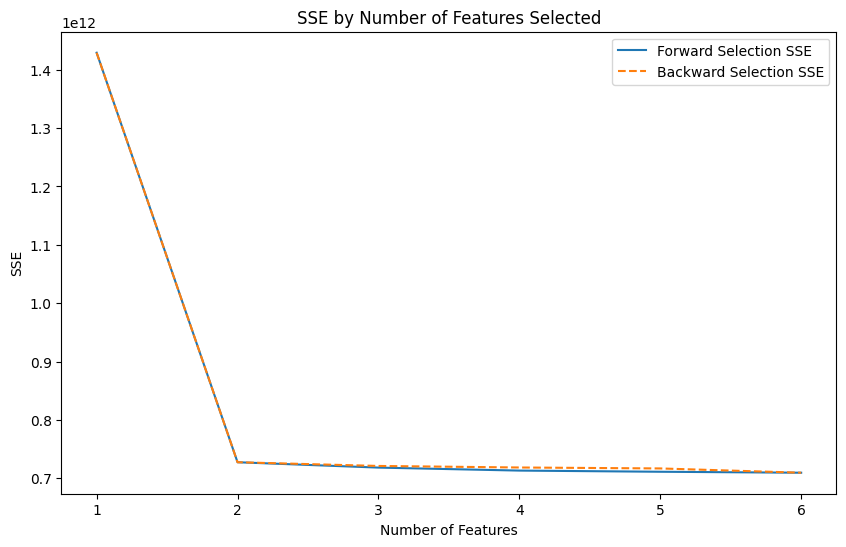

In [ ]:
# First, define a function to calculate SSE for a given set of features
def calculate_sse(data, features, target):
    model = sm.OLS(target, sm.add_constant(data[features])).fit()
    sse = np.sum(model.resid ** 2)
    return sse

# Now, calculate SSEs for forward and backward selection
forward_sses = [calculate_sse(data, selected_features_forward[:i+1], data['MSRP']) for i in range(len(selected_features_forward))]
backward_sses = [calculate_sse(data, selected_features_backwards[:i+1], data['MSRP']) for i in range(len(selected_features_backwards))]

# Create a DataFrame for the SSEs
sse_df = pd.DataFrame({
    'Number of Features': list(range(1, len(selected_features_forward) + 1)),
    'SSE Forward': forward_sses,
    'SSE Backward': backward_sses
})

# Display the DataFrame
print(sse_df)

# Now plot the SSEs
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(sse_df['Number of Features'], sse_df['SSE Forward'], label='Forward Selection SSE')
plt.plot(sse_df['Number of Features'], sse_df['SSE Backward'], label='Backward Selection SSE', linestyle='--')
plt.xlabel('Number of Features')
plt.ylabel('SSE')
plt.legend()
plt.title('SSE by Number of Features Selected')
plt.show()





# Final Regression Model


In [ ]:
import numpy as np
import statsmodels.api as sm

# Selected features
features_to_use = ['Popularity', 'Engine HP', 'Year', 'city mpg']

# Applying a log transformation to the 'Engine HP' and 'city mpg' features to check for improvement
# If any of these features can be zero, you should add a constant before taking the log
data['log_Engine_HP'] = np.log(data['Engine HP'] + 1)  # Adding 1 to avoid log(0)
data['log_city_mpg'] = np.log(data['city mpg'] + 1)

#  new list with the transformed features
transformed_features_to_use = ['Popularity', 'log_Engine_HP', 'Year', 'log_city_mpg',]

# Building the final model
X = sm.add_constant(data[transformed_features_to_use])
y = data['MSRP']
final_model = sm.OLS(y, X).fit()

# Display the regression results
print(final_model.summary())

# Calculate the SSE
sse_final = np.sum(final_model.resid ** 2)
print(f'SSE of the final model: {sse_final}')


                            OLS Regression Results                            
Dep. Variable:                   MSRP   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     6258.
Date:                Sun, 05 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:33:19   Log-Likelihood:            -1.0724e+05
No. Observations:               10239   AIC:                         2.145e+05
Df Residuals:                   10234   BIC:                         2.145e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.875e+06   2.94e+04    -63.737

# conclusion:

Our Regression Model achieved an R-squared value of 0.71, indicating that 71% of the variability can be explained by the model's predictors. This does give me some confidence on the model i built.


The next steps would be to address the non-normality of residuals that could affect the robustness of hypothesis tests and confidence intervals derived from the model. Also, i am worried about the potential for multicollinearity, indicated by a high condition number.

I would've liked to have done a better job at improving Data Processing, i am not very confident that i've done this optimally.


What i would tell bussiness leaderhsip:

To the business leadership in the automotive industry, I would convey that our model underscores the significant impact of vehicle popularity, horsepower, recent production year, and fuel efficiency on pricing strategies. These factors should be key considerations in setting and adjusting the MSRP of vehicles. However, I would also stress the need for caution due to the model's current limitations and the importance of further analysis to ensure that decisions are made on the most reliable predictive ground possible.



